# Data Collection

## Objectives

1. Add kaggle.json file
2. Successfully pull data from Kaggle via API
3. Add json file to git.ignore

## Inputs

- Cherry leaves data from Kaggle API


## Outputs

- Unzipped cherry leaves image folders

## Set Directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detector/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print(current_dir)

/workspaces/mildew-detector/jupyter_notebooks


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detector'

## Import Packages

In [4]:
import numpy
from PIL import Image

In [ ]:
%pip install -r /workspaces/mildew-detector/requirements.txt

## Install Kaggle

In [ ]:
%pip install kaggle==1.5.12

#### Configure Kaggle

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

#### Set Kaggle Dataset and Download

In [ ]:
KaggleDatasetPath = "codeinstitute/cherry-leaves"
DestinationFolder = "inputs/mildew_dataset"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Unzip downloaded file and delete zip file.

In [ ]:
import zipfile
with zipfile.ZipFile(DestinationFolder + '/cherry-leaves.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/cherry-leaves.zip')

## Data Preparation

#### Data Cleaning

Check and remove non-image files

In [ ]:
def remove_non_image_file(my_data_dir):
    image_extension = ('.png', '.jpg', '.jpeg')
    folders = os.listdir(my_data_dir)
    for folder in folders:
        files = os.listdir(my_data_dir + '/' + folder)
        # print(files)
        i = []
        j = []
        for given_file in files:
            if not given_file.lower().endswith(image_extension):
                file_location = my_data_dir + '/' + folder + '/' + given_file
                os.remove(file_location)  # remove non image file
                i.append(1)
            else:
                j.append(1)
                pass
        print(f"Folder: {folder} - has image file", len(j))
        print(f"Folder: {folder} - has non-image file", len(i))

In [ ]:
remove_non_image_file(my_data_dir='inputs/mildew_dataset/cherry-leaves/')

#### Resize Images to Smaller Pixel Size
This is to avoid issues with a too-large slug for deployment later down the line. 

In [5]:
from os import listdir

In [13]:
def image_resize(path):
    print(path)
    myslice = slice(3)
    enough = (os.listdir(path)[myslice])
    newPath = path + 'experiment/'
    print (newPath)

    for item in enough:
        pathway = path + item
        print('pathway test', pathway)
        usePath = newPath + item
        print('User test', usePath)
        this = Image.open(pathway)
        this.show()
        resized = this.resize((100, 100))
        resized.show()
        print('resized test', resized)
        resized.save(usePath, 'JPEG')

        

inputs/mildew_dataset/cherry-leaves/healthy/
inputs/mildew_dataset/cherry-leaves/healthy/experiment/
pathway test inputs/mildew_dataset/cherry-leaves/healthy/36d00ba4-ce07-4c30-b5cf-416c13d22a47___JR_HL 9804_180deg.JPG
User test inputs/mildew_dataset/cherry-leaves/healthy/experiment/36d00ba4-ce07-4c30-b5cf-416c13d22a47___JR_HL 9804_180deg.JPG


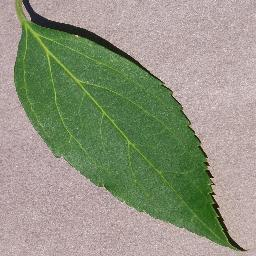

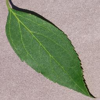

resized test <PIL.Image.Image image mode=RGB size=100x100 at 0x7F00F1BCFD90>
pathway test inputs/mildew_dataset/cherry-leaves/healthy/a36fb3a6-f05b-4541-8617-6079781ea8ed___JR_HL 9831_180deg.JPG
User test inputs/mildew_dataset/cherry-leaves/healthy/experiment/a36fb3a6-f05b-4541-8617-6079781ea8ed___JR_HL 9831_180deg.JPG


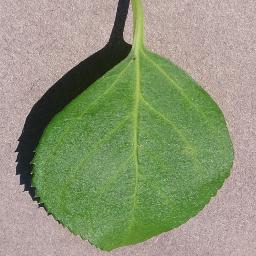

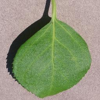

resized test <PIL.Image.Image image mode=RGB size=100x100 at 0x7F0103F74FD0>
pathway test inputs/mildew_dataset/cherry-leaves/healthy/d620f22d-c209-4627-b2b4-cd8e65de8212___JR_HL 4037.JPG
User test inputs/mildew_dataset/cherry-leaves/healthy/experiment/d620f22d-c209-4627-b2b4-cd8e65de8212___JR_HL 4037.JPG


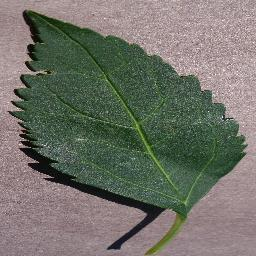

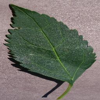

resized test <PIL.Image.Image image mode=RGB size=100x100 at 0x7F00F1BCFD90>


In [14]:
image_resize(path='inputs/mildew_dataset/cherry-leaves/healthy/')

### Split Train and Validation Test Set

Training, validation and test sets split by 0.7, 0.1 and 0.2 ratios. 

In [ ]:
import os
import shutil
import random
import joblib


def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):

    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("train_set_ratio + validation_set_ratio + test_set_ratio should sum to 1.0")
        return

    # gets classes labels
    labels = os.listdir(my_data_dir)  # it should get only the folder name
    if 'test' in labels:
        pass
    else:
        # create train, test folders with classes labels sub-folder
        for folder in ['train', 'validation', 'test']:
            for label in labels:
                os.makedirs(name=my_data_dir + '/' + folder + '/' + label)

        for label in labels:

            files = os.listdir(my_data_dir + '/' + label)
            random.shuffle(files)

            train_set_files_qty = int(len(files) * train_set_ratio)
            validation_set_files_qty = int(len(files) * validation_set_ratio)

            count = 1
            for file_name in files:
                if count <= train_set_files_qty:
                    # move a given file to the train set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/train/' + label + '/' + file_name)

                elif count <= (train_set_files_qty + validation_set_files_qty):
                    # move a given file to the validation set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/validation/' + label + '/' + file_name)

                else:
                    # move given file to test set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/test/' + label + '/' + file_name)

                count += 1

            os.rmdir(my_data_dir + '/' + label)


In [ ]:
split_train_validation_test_images(my_data_dir=f"inputs/mildew_dataset/cherry-leaves/",
                                   train_set_ratio=0.7,
                                   validation_set_ratio=0.1,
                                   test_set_ratio=0.2
                                   )